In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [260]:
# 데이터 로드
data = pd.read_csv("Mall_Customers.csv")

In [53]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- ID 제외하고 feature의 타입(type)은 int형이 3개, object형이 1개입니다.

In [55]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [56]:
data.describe(include='O')

,Gender
count,200
unique,2
top,Female
freq,112


In [57]:
for value in data:
    print("######################")
    print(value)
    print("######################")
    print(data[value].value_counts())

######################
CustomerID
######################
200    1
63     1
73     1
72     1
71     1
      ..
131    1
130    1
129    1
128    1
1      1
Name: CustomerID, Length: 200, dtype: int64
######################
Gender
######################
Female    112
Male       88
Name: Gender, dtype: int64
######################
Age
######################
32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64
######################
Annual Income (k$)
######################
54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58  

##### Null 값 확인

<AxesSubplot:>

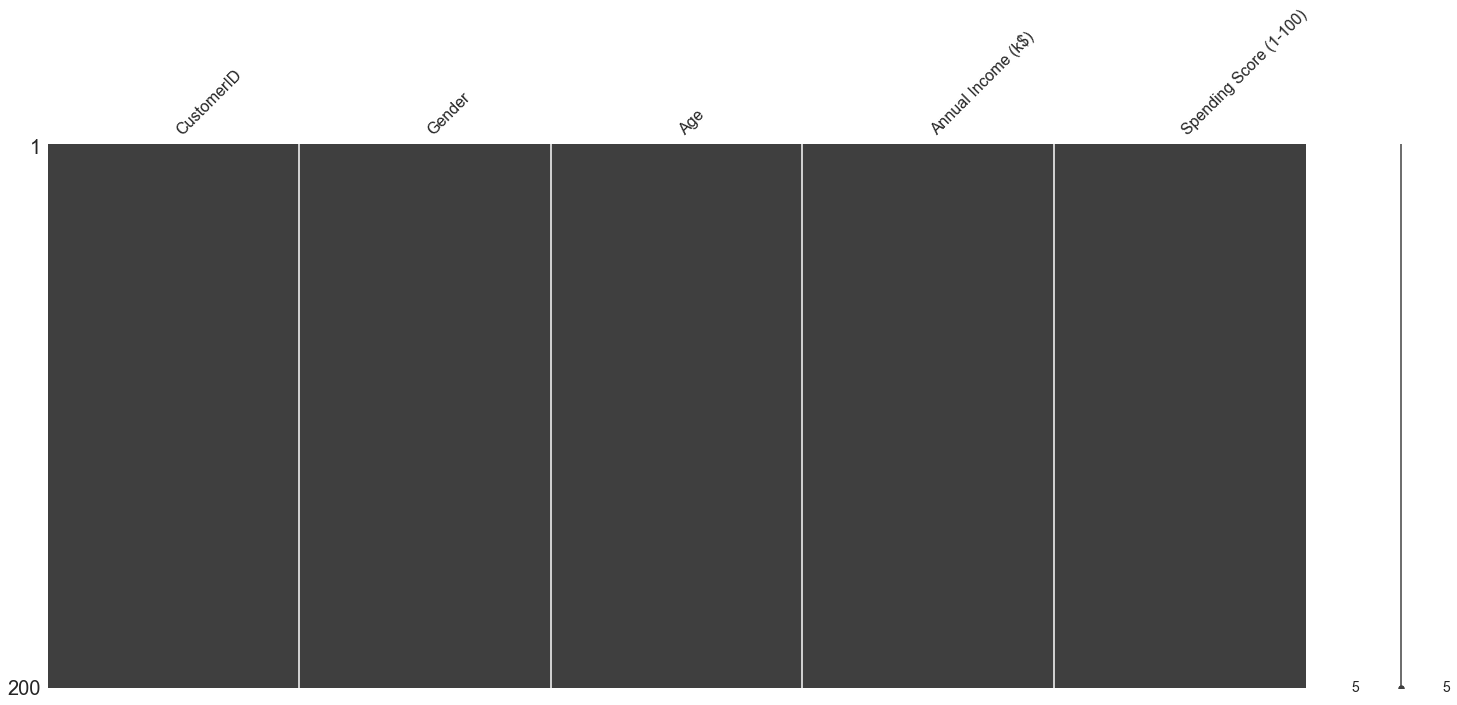

In [58]:
import missingno as msno

msno.matrix(data)

In [59]:
data.isnull().sum().sum()

0

- null값은 없는 데이터!

#### EDA

###### 범주형 변수(Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

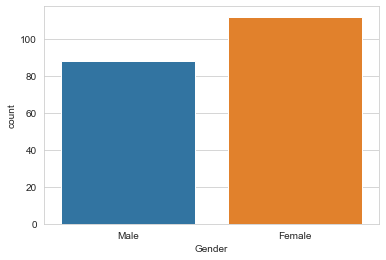

In [60]:
sns.countplot(data['Gender'])

([<matplotlib.patches.Wedge at 0x2093f17a250>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')])

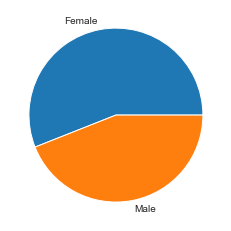

In [61]:
gender_count = data['Gender'].value_counts()
plt.pie(gender_count, labels = gender_count.index)

###### 수치형 변수

##### 1) Age

<AxesSubplot:ylabel='Density'>

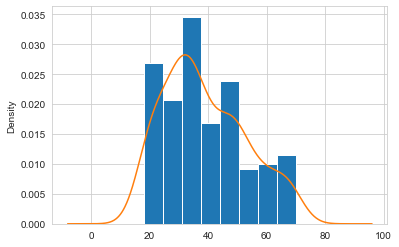

In [62]:
plt.hist(data['Age'], bins='fd', density=True)
data['Age'].plot.density()

- 30대 언저리가 가장 많아보임.

###### 성별에 따른 나이 (Age vs Gender)

In [63]:
# 시각화를 위한 라이브러리 설치 & 로드
# !pip install plotnine

from plotnine import *

<Figure size 432x288 with 0 Axes>

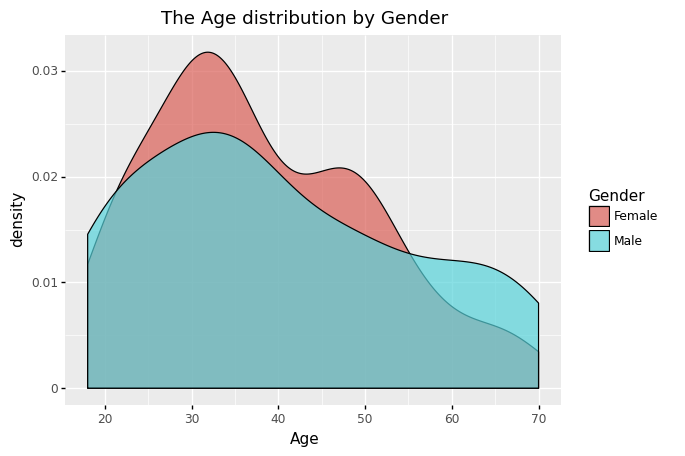

<ggplot: (139916345950)>

In [64]:
fig = plt.figure()

ggplot(data, aes(x='Age', fill='Gender')) + geom_density(alpha=0.7) + ggtitle("The Age distribution by Gender")

- 성별의 따른 나이의 분포는 연령이 어릴수록 여성이 많고 연령이 높을수록 남자가 많음.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

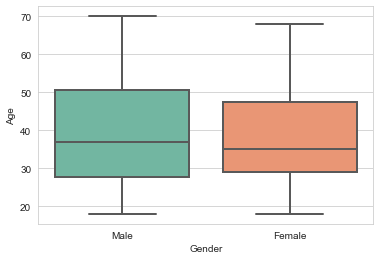

In [65]:
sns.boxplot(x='Gender', y='Age', data=data, palette = 'Set2', linewidth=2)

##### 2) Annual Income (k$)	

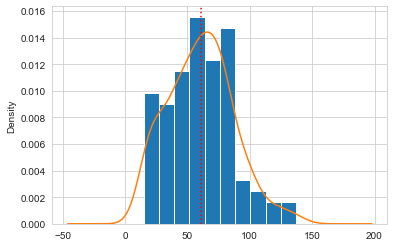

In [66]:
plt.hist(data['Annual Income (k$)'], bins='fd', density=True)
data['Annual Income (k$)'].plot.density()
plt.axvline(data['Annual Income (k$)'].mean(), color='r', linestyle='dotted')

- 살짝 왼쪽으로 치우친 정규분포를 따름.
- 대부분의 수입이 평균수준이 가장 많은듯.

###### 연봉에 따른 나이 (Income vs Gender)

<Figure size 432x288 with 0 Axes>

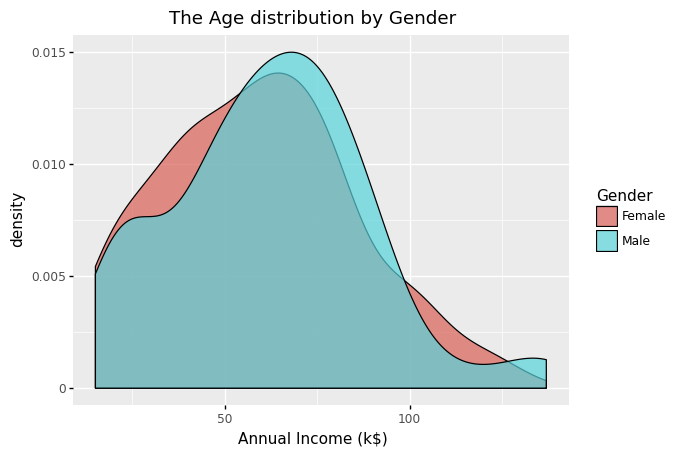

<ggplot: (139915849183)>

In [67]:
fig = plt.figure()

ggplot(data, aes(x='Annual Income (k$)', fill='Gender')) + geom_density(alpha=0.7) + ggtitle("The Age distribution by Gender")

- 성별의 따른 연봉의 대부분 비슷함.

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

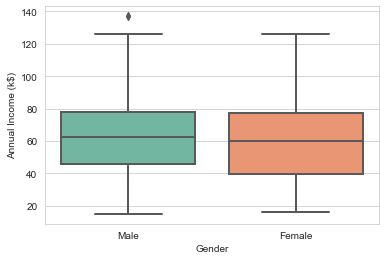

In [68]:
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette = 'Set2', linewidth=2)

##### 3) Spending Score (1-100)

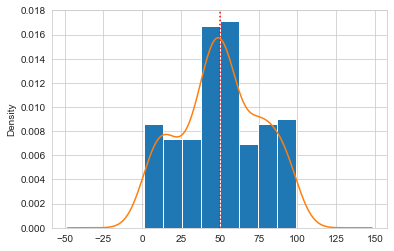

In [69]:
plt.hist(data['Spending Score (1-100)'], bins='fd', density=True)
data['Spending Score (1-100)'].plot.density()
plt.axvline(data['Spending Score (1-100)'].mean(), color='r', linestyle='dotted')

- 소비 지수는 대부분 중간 정도가 가장 많음

###### 소비 지수에 따른 나이 (Spending Score vs Gender)

<Figure size 432x288 with 0 Axes>

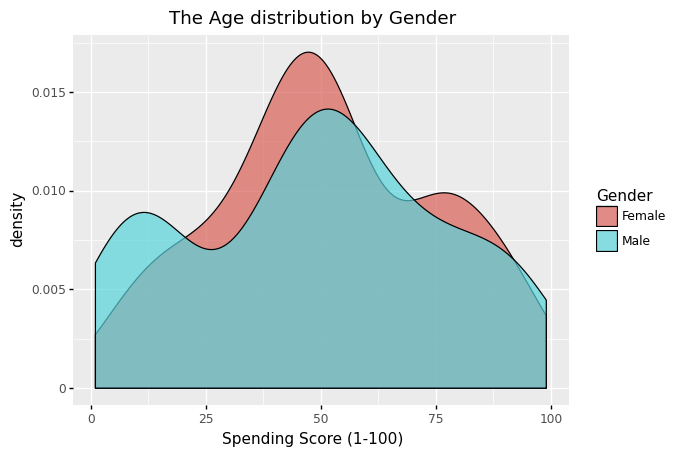

<ggplot: (139922609149)>

In [70]:
fig = plt.figure()

ggplot(data, aes(x='Spending Score (1-100)', fill='Gender')) + geom_density(alpha=0.7) + ggtitle("The Age distribution by Gender")

- 성별의 따른 소비지수도 비슷함.

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

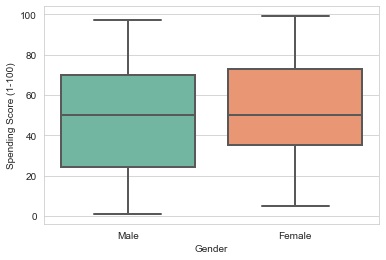

In [71]:
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette = 'Set2', linewidth=2)

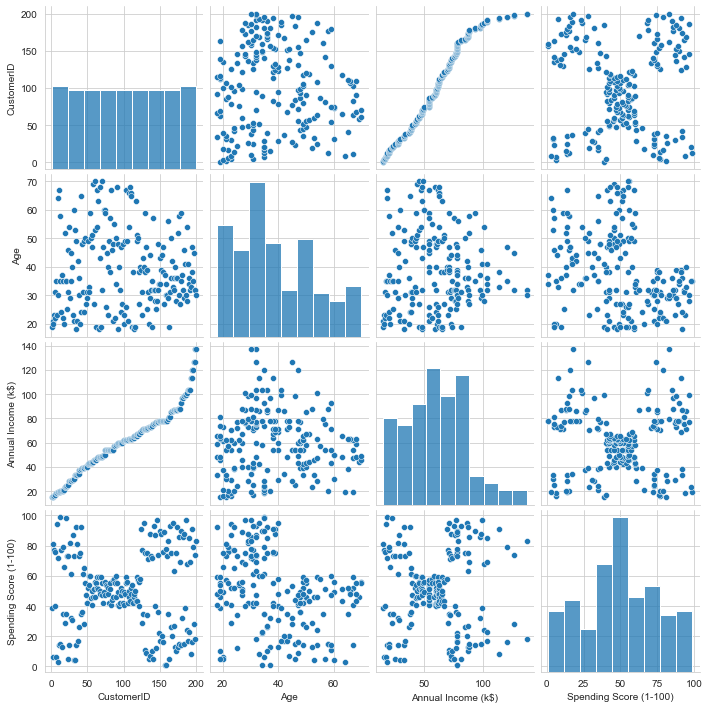

In [106]:
sns.pairplot(data)

###### Spending Score와 Annual Income 이 Segmentation 하기엔 가장 좋은 특징을 갖고있음.

#### Preprocessing

In [261]:
# 분석에 안쓸 ID 지우기
data = data.drop("CustomerID", axis=1)

In [262]:
# 데이터 스케일링 함수
from sklearn.preprocessing import MinMaxScaler

def scaling(df):
    columns = df.columns.tolist()
    
    scaler = MinMaxScaler()

    for col in columns:
        df.loc[:, col] = scaler.fit_transform(np.array(df[col]).reshape(-1, 1))
    
    return df

In [128]:
# 필요한 라이브러리, 함수 정의
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def elbow(x):
    k = []
    sse = []
    
    for i in range(1, 11):
        model = KMeans(n_clusters = i)
        model.fit(x)
        sse.append(model.inertia_)
        k.append(i)
        
    plt.plot(k, sse, marker='o')
    plt.xlabel("number of cluster")
    plt.ylabel("SSE")
    plt.xticks(range(1, 11))
    plt. show()
    
def get_kmeans_silhouette(df):
    best_n = 1
    best_score = -1

    for n_cluster in range(2, 11):
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(df)
        cluster = kmeans.predict(df)
        score = silhouette_score(df, cluster)

        print("클러스터의 수 : {}, 실루엣 점수 : {:.3f}".format(n_cluster, score))
        if score > best_score:
            best_n = n_cluster
            best_score = score

    print("\n가장 높은 실루엣 점수를 가진 클러스터 수 : {}, 실루엣 점수 : {:.3f}".format(best_n, best_score))

# Experiment1
###### Gender 상관 없이 군집화

### 1) KMeans

In [263]:
data_all = data.drop("Gender", axis=1)

In [264]:
data_all = scaling(data_all)

###### Age X Annual Income

In [265]:
data_all_aa = data_all.iloc[:, :2]

클러스터의 수 : 2, 실루엣 점수 : 0.413
클러스터의 수 : 3, 실루엣 점수 : 0.444
클러스터의 수 : 4, 실루엣 점수 : 0.386
클러스터의 수 : 5, 실루엣 점수 : 0.376
클러스터의 수 : 6, 실루엣 점수 : 0.391
클러스터의 수 : 7, 실루엣 점수 : 0.401
클러스터의 수 : 8, 실루엣 점수 : 0.411
클러스터의 수 : 9, 실루엣 점수 : 0.410
클러스터의 수 : 10, 실루엣 점수 : 0.410

가장 높은 실루엣 점수를 가진 클러스터 수 : 3, 실루엣 점수 : 0.444


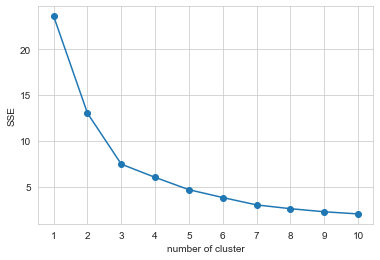

In [266]:
get_kmeans_silhouette(data_all_aa)
elbow(data_all_aa)

- 두가지 지표를 종합했을때 k = 3인것이 적절해보임.

In [267]:
# k가 3인 Kmean 선언
kmeans = KMeans(n_clusters = 3)
# 모델 학습
kmeans.fit(data_all_aa)
# cluster 할당
cluster = kmeans.predict(data_all_aa)

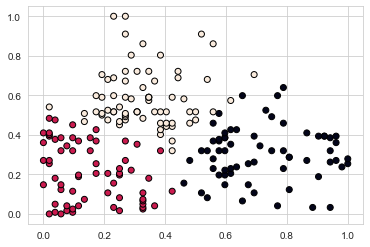

In [268]:
plt.scatter(data_all_aa['Age'], data_all_aa['Annual Income (k$)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

- 빨간색 : 나이가 어리고 수입이 별로 없는 군집
- 하얀색 : 나이대는 주로 젊고 수입이 많은 군집
- 검정색 : 나이대는 많지만 수입이 그렇게 많지 않은 군집

###### Annual Income X Spending Score

In [269]:
data_all_as = data_all.iloc[:, 1:]

클러스터의 수 : 2, 실루엣 점수 : 0.333
클러스터의 수 : 3, 실루엣 점수 : 0.451
클러스터의 수 : 4, 실루엣 점수 : 0.496
클러스터의 수 : 5, 실루엣 점수 : 0.559
클러스터의 수 : 6, 실루엣 점수 : 0.538
클러스터의 수 : 7, 실루엣 점수 : 0.517
클러스터의 수 : 8, 실루엣 점수 : 0.432
클러스터의 수 : 9, 실루엣 점수 : 0.441
클러스터의 수 : 10, 실루엣 점수 : 0.447

가장 높은 실루엣 점수를 가진 클러스터 수 : 5, 실루엣 점수 : 0.559


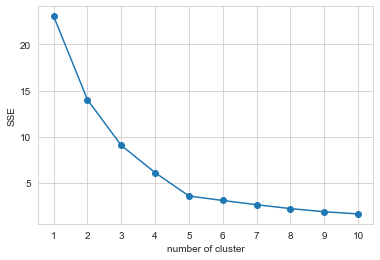

In [270]:
get_kmeans_silhouette(data_all_as)
elbow(data_all_as)

- 두가지 지표를 종합했을때 k = 5인것이 적절해보임.

In [271]:
# k가 3인 Kmean 선언
kmeans = KMeans(n_clusters = 5)
# 모델 학습
kmeans.fit(data_all_as)
# cluster 할당
cluster = kmeans.predict(data_all_as)

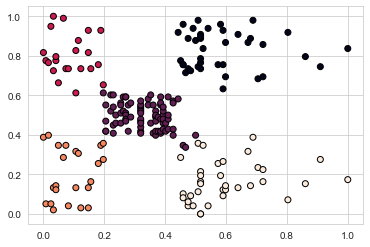

In [272]:
plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

- 빨간색 : 연봉은 적지만 지출이 많은 군집
- 하얀색 : 연봉도 많고 지출도 많은 군집
- 주황색 : 연봉은 많지만 지출은 적은 군집
- 갈 색 : 연봉과 지출 모두 보통 수준인 군집
- 초록색 : 연봉과 지출 모두 적은 군집

###### Spending Score X Age

In [273]:
data_all_sa = data_all.iloc[:, [0, 2]]

클러스터의 수 : 2, 실루엣 점수 : 0.473
클러스터의 수 : 3, 실루엣 점수 : 0.441
클러스터의 수 : 4, 실루엣 점수 : 0.436
클러스터의 수 : 5, 실루엣 점수 : 0.446
클러스터의 수 : 6, 실루엣 점수 : 0.455
클러스터의 수 : 7, 실루엣 점수 : 0.405
클러스터의 수 : 8, 실루엣 점수 : 0.419
클러스터의 수 : 9, 실루엣 점수 : 0.430
클러스터의 수 : 10, 실루엣 점수 : 0.445

가장 높은 실루엣 점수를 가진 클러스터 수 : 2, 실루엣 점수 : 0.473


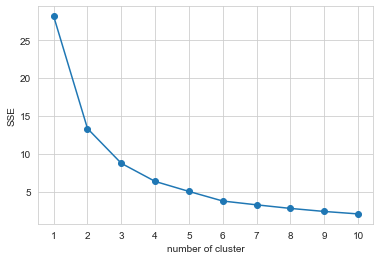

In [274]:
get_kmeans_silhouette(data_all_sa)
elbow(data_all_sa)

- 두가지 지표를 종합했을때 k = 2인것이 적절해보임.

In [275]:
# k가 3인 Kmean 선언
kmeans = KMeans(n_clusters = 2)
# 모델 학습
kmeans.fit(data_all_sa)
# cluster 할당
cluster = kmeans.predict(data_all_sa)

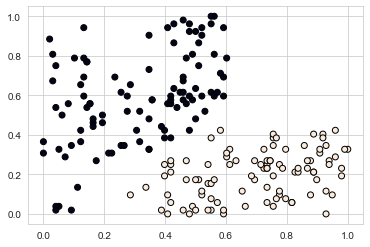

In [276]:
plt.scatter(data_all_sa['Spending Score (1-100)'], data_all_sa['Age'],  linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

- 검정색 : 전반적으로 나이가 많고 지출을 적게하는 군집
- 하얀색 : 나이가 어리지만 지출이 많은 군집

### 2) Hierarchical Clustering
- Bottom-Up 방식의 Agglomerative Method

###### Annual Income X Spending Score 를 대상으로 거리 측정 방법을 변경해가며 결과 비교.

###### Single Linkage

In [277]:
from sklearn.cluster import AgglomerativeClustering

single_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='single')

In [278]:
# 학습
single_cluster = single_clustering.fit_predict(data_all_as)

 - 산점도

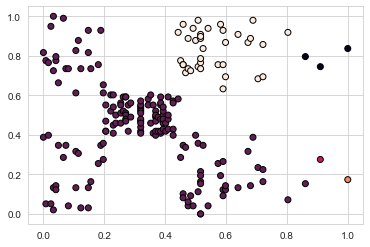

In [279]:
plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = single_cluster, edgecolor = 'black')
plt.show()

- Single Linkage 방법으로는 적절히 군집화를 수행하지 못하는듯함.

###### Complete Linkage

In [280]:
complete_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='complete')

In [281]:
# 학습
complete_cluster = complete_clustering.fit_predict(data_all_as)

 - 산점도

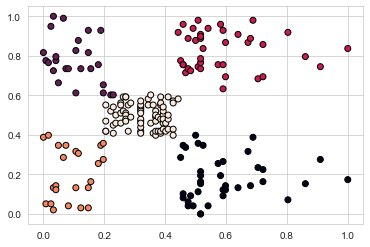

In [282]:
plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = complete_cluster, edgecolor = 'black')
plt.show()

- 데이터에 적합한 거리 계산 방식으로 보여짐.

###### Average Linkage

In [283]:
average_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='average')

In [284]:
# 학습
average_cluster = average_clustering.fit_predict(data_all_as)

 - 산점도

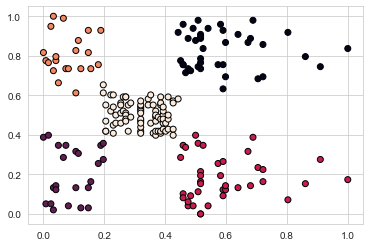

In [285]:
plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = average_cluster, edgecolor = 'black')
plt.show()

- 데이터에 적합하게 군집을 형성한다.

###### Ward Linkage

In [286]:
ward_clustering = AgglomerativeClustering(n_clusters=5, 
                                            linkage='ward')

In [287]:
# 학습
ward_cluster = ward_clustering.fit_predict(data_all_as)

 - 산점도

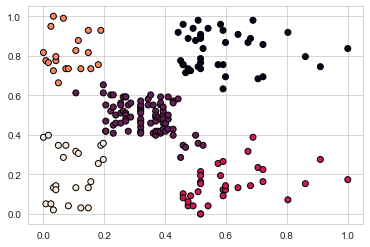

In [288]:
plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = ward_cluster, edgecolor = 'black')
plt.show()

- Ward 연결법도 적절한 군집결과를 산출

###### 해당 데이터셋에 적합한 Distance 계산법 : Average > Ward > Complete > Single

- 덴드로그램

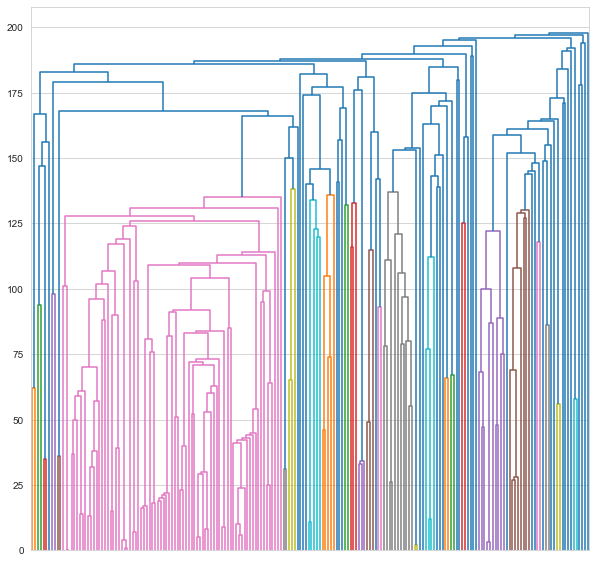

In [289]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 10))

children = single_clustering.children_

distance = np.arange(children.shape[0])

no_of_observations = np.arange(2, children.shape[0] + 2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p = len(data_all_as), labels = complete_cluster, 
           show_contracted=True, no_labels = True, )

plt.show()

- 육안으로 봤을때 적절한 cluster를 찾기 쉽지 않아보임.

### DBSCAN

In [290]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()

In [291]:
# 모델 학습
dbscan_cluster = dbscan.fit_predict(data_all_as)

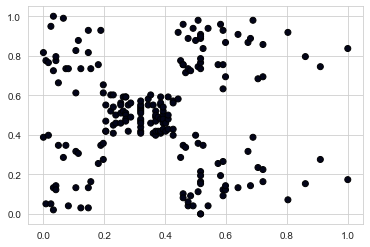

In [292]:
plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = dbscan_cluster, edgecolor = 'black')
plt.show()

- 군집 결과를 잘 생산해내지 못함.

###### Hyperparameter Tuning

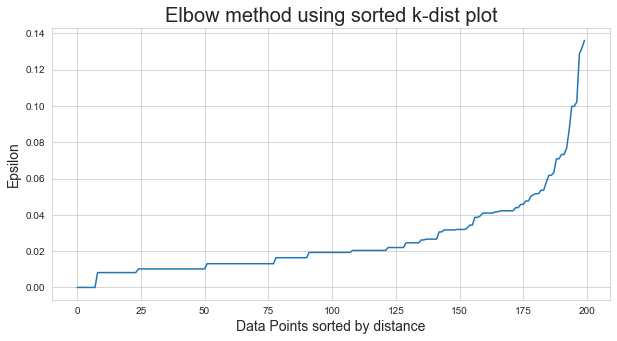

In [293]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(data_all_as)
distances, indices = neighbors.kneighbors(data_all_as)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

###### 최대 곡률 지점은 eps = 0.09 정도로 보여짐.

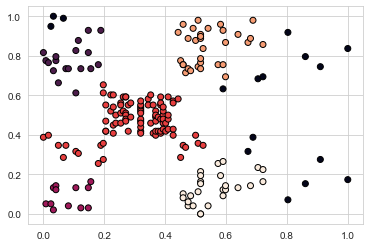

In [308]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.09, min_samples=5)
dbscan_cluster = dbscan.fit_predict(data_all_as)

plt.scatter(data_all_as['Annual Income (k$)'], data_all_as['Spending Score (1-100)'], linewidth = 1, c = dbscan_cluster, edgecolor = 'black')
plt.show()

###### min samples는 실험결과 5가 가장 적당해보임.